2.19.0
Epoch 1/1500


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.3272 - mae: 0.3360 - val_loss: 0.3309 - val_mae: 0.3337
Epoch 2/1500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3241 - mae: 0.3355 - val_loss: 0.3304 - val_mae: 0.3339
Epoch 3/1500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3256 - mae: 0.3371 - val_loss: 0.3297 - val_mae: 0.3341
Epoch 4/1500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3218 - mae: 0.3357 - val_loss: 0.3288 - val_mae: 0.3345
Epoch 5/1500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3168 - mae: 0.3361 - val_loss: 0.3279 - val_mae: 0.3353
Epoch 6/1500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3223 - mae: 0.3390 - val_loss: 0.3261 - val_mae: 0.3358
Epoch 7/1500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3201 - mae: 0.3429 - val_loss: 0.3244 - val_mae: 0.3372
Epoch 8/1500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3079 - mae: 0.3391 - val_loss: 0.3222 - val_mae: 0.3397
Epoch 9/1500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3120 -

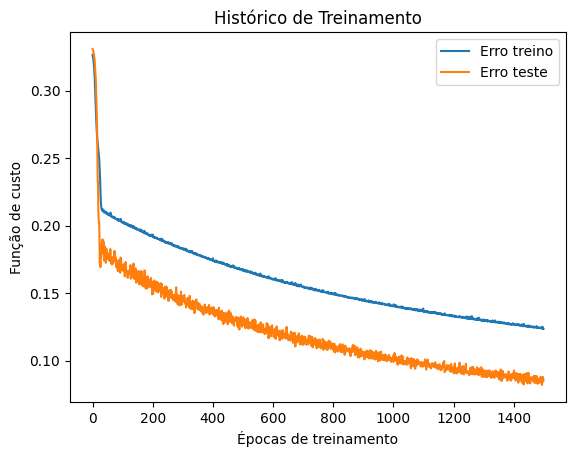

0B -> L1N0: -3.1561341285705566
0B -> L1N1: -0.09040433168411255
0B -> L1N2: 2.506985902786255
L0N0                   -> L1N0 = 0.34346818923950195
L0N0                   -> L1N1 = -0.22095561027526855
L0N0                   -> L1N2 = -0.13657525181770325
L0N1                   -> L1N0 = -2.5980634689331055
L0N1                   -> L1N1 = 2.291367530822754
L0N1                   -> L1N2 = -0.3456023633480072


In [1]:
# colab.research.google.com

!pip install numpy
!pip install matplotlib
!pip install tensorflow

import tensorflow as tf
print(tf.__version__)

import keras
import pandas as pd
import numpy as np

# import warnings
# warnings.filterwarnings('ignore')




X_treino = np.array(
    [
        [26,1.50], [19,1.70], [18,1.80], [17,1.30], [24,1.30],
        [17,1.20], [15,1.60], [16,1.40], [14,1.45], [23,1.70], [17,1.35],
        [18,1.90], [17,1.75], [25,1.80], [12,1.25], [22,1.50]
    ]
)
Y_treino = np.array( [
         [1,0,0],[0,1,0],[0,1,0],[0,0,1],[1,0,0],
         [0,0,1],[0,1,0],[0,0,1],[0,0,1],[1,0,0],[0,0,1],
         [0,1,0],[0,1,0],[1,0,0],[0,0,1],[1,0,0] ] )
X_teste = np.array(
    [
        [25,1.67], [22,1.47], [23,1.88]
    ]
)
Y_teste = np.array( [[1,0,0],[1,0,0],[1,0,0]] )


X_train = X_treino
X_test = X_teste





X_train





X_test







from keras.models import Sequential
from keras.layers import Dense

modelo = Sequential() # Inicializa a Rede Neural Artificial
# modelo.add(Dense(units = 3, activation = 'tanh', input_dim = X_train.shape[1]))
modelo.add(Dense(units = 3, activation = 'sigmoid', input_dim = X_train.shape[1]))







modelo.compile(loss='mse', optimizer = 'adam', metrics=['mae'])


resultado = modelo.fit(X_train, Y_treino, batch_size = 1, epochs = 1500, validation_data=(X_test, Y_teste))








Y_predito = modelo.predict(X_test)
Y_correto = np.array([])
print("Valores Preditos:",Y_predito)








for i in Y_predito:
    Y_parte = ([1 if max(i)==y else 0 for y in i])
    print(Y_parte)
    Y_correto = np.concatenate((Y_correto,Y_parte))

Y_correto = Y_correto.reshape(Y_predito.shape[0], Y_predito.shape[1])
print("Valores Preditos:",Y_correto)






total = 0
correto = 0
errado = 0
for i in range(Y_correto.shape[0]):
  total=total+1
  if((Y_teste[i,0] == Y_correto[i,0]) and (Y_teste[i,1] == Y_correto[i,1]) and (Y_teste[i,2] == Y_correto[i,2])):
    correto=correto+1
  else:
    errado=errado+1

print("Total " + str(total))
print("Correto " + str(correto))
print("Errado " + str(errado))










import matplotlib.pyplot as plt

plt.plot(resultado.history['loss'])
plt.plot(resultado.history['val_loss'])
plt.title('Histórico de Treinamento')
plt.ylabel('Função de custo')
plt.xlabel('Épocas de treinamento')
plt.legend(['Erro treino', 'Erro teste'])
plt.show()







# Mostra Pesos
for layerNum, layer in enumerate(modelo.layers):
    weights = layer.get_weights()[0]
    biases = layer.get_weights()[1]

    for toNeuronNum, bias in enumerate(biases):
        print(f'{layerNum}B -> L{layerNum+1}N{toNeuronNum}: {bias}')

    for fromNeuronNum, wgt in enumerate(weights):
        for toNeuronNum, wgt2 in enumerate(wgt):
            print(f'L{layerNum}N{fromNeuronNum} \
                  -> L{layerNum+1}N{toNeuronNum} = {wgt2}')


